#### Aritificial Intelligence For NLP 02  

* 人工智能（Peter Norving / Stuart J.Russell）
* 计算机程序的构造与解释

1. 基于规则
2. 基于概率
3. 基于搜索
4. 机器学习

##### 一、课程答疑  

1. 语言模型
    * out of vocabulary(OOV) : 概率为0的单词设置固定值
    * language model - smooth ：平滑问题
    
##### 二、搜索  

* Map Application
* Decision Systen
* Expert System  

1. 决策问题（决策过程）Map / Routing
    * 正则表达式
    
##### 三、机器学习
* AI 的过程 ：
    * 创造函数，产生特定输出
    * 如何设计一个函数来达到指定目标？
    * 问题越复杂，函数越难通过人工观察构建！
    * 怎么让计算机生成函数？
    * 基于数据驱动 - 分类垃圾邮件（贝叶斯）
* 概率与机器学习区别
    * 概率是一种方法，可以应用在任意场景
    * 机器学习一种思考方法，可能使用概率也可能不使用概率
    * 概率如何使用概率，机器学习如何基于已有数据生成函数

In [17]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [12]:
# Input ： String -> dict
test_str = "{name:'兰州', geoCoord:[103.73, 36.03]}"

In [2]:
import re

In [15]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [16]:
re.findall(pattern, test_str)

[('兰州', '103.73', '36.03')]

In [18]:
city_location = {}

In [19]:
for line in coordination_source.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]
    # python re referenes: https://docs.python.org/3/library/re.html
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
    print(city, x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [20]:
import math

In [21]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [22]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [23]:
get_city_distance('杭州', '上海')

153.5185697155768

In [24]:
import networkx as nx

In [25]:
cities = list(city_location.keys())
city_graph = nx.Graph()
city_graph.add_nodes_from(cities)

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

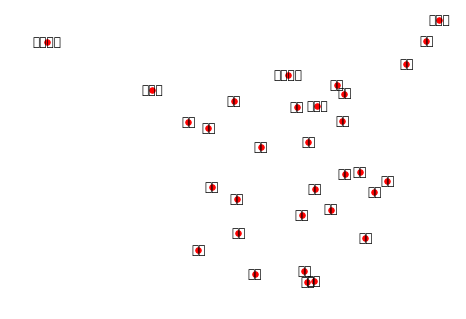

In [29]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [ ]:
# 定义各个点的链接关系

In [ ]:
# 怎么获取量个点之间可行的路径
# step 1 ：获取起点的所有连接点
# step 2 ： 看起点下的连接点的所有连接点
# step 3 ： 直至终点

# 抽象过程 广度优先搜索 / 深度优先搜索 扩展顺序决定了深度 or 广度

In [ ]:
# 广度优先

In [ ]:
# 深度优先

In [ ]:
# 生成函数？怎么生成？！！！
# 如何评价生成的函数是否合理？！！！与实际值差值最小，所有点损失值之和最小即最合理
# 正确的改变方向
# 2nd-method ：监督让他变化 -> 监督学习

In [ ]:
# 波士顿房价预测
from sklearn.datasets import load_boston